### CO2 Emissions and Average Temperature Rise


#### Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Import the CSV files

In [2]:
jordanTempAnnual=pd.read_csv('jordan_temp_annual.csv') #Importing the annual temperature in Jordan 
jordanCo2Emissions=pd.read_csv('jordan_co2_emissions.csv') # Importing the CO2 emition file
MonthlyTemp=pd.read_csv('jordan_temp_monthly.csv') #Temperature per month 
sectorswastes=pd.read_csv('Sectors.csv') # CO2 emission per sector [1990-2019]


### Temperature Analysis:


##### At initial step; the aim is to find how the temperature is changing over the years.

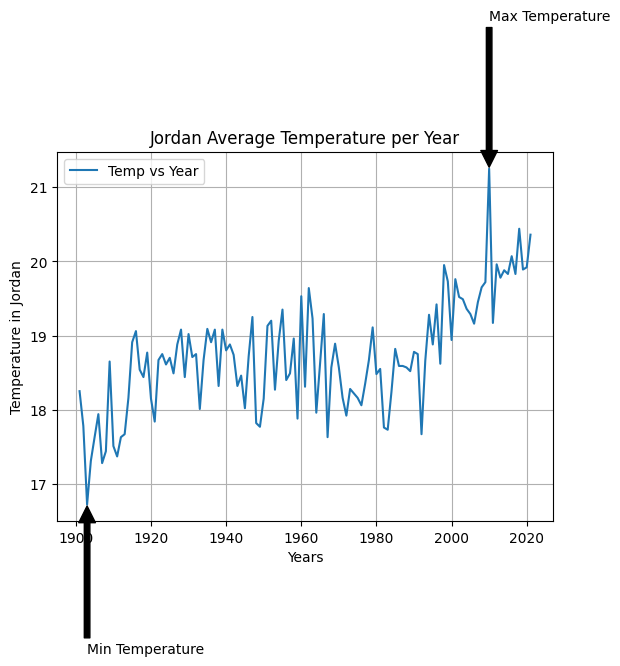

In [3]:
jordanTempAnnual.head()
Year=jordanTempAnnual["Year"].tolist()
Jordan=jordanTempAnnual["Jordan"].tolist()
#r=Jordan.max()
plt.plot(Year,Jordan,label='Temp vs Year')
plt.title("Jordan Average Temperature per Year")
plt.xlabel("Years")
plt.ylabel("Temperature in Jordan")
plt.annotate('Max Temperature', xy=(2010, 21.25),xytext=(2010, 21.25+2 ),arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('Min Temperature', xy=(1903, 16.72),xytext=(1903, 16.72-2 ),arrowprops=dict(facecolor='black', shrink=0.01))
plt.legend()
plt.grid()


##### The second step was to find whether the location affect the raising in temperature or not.  

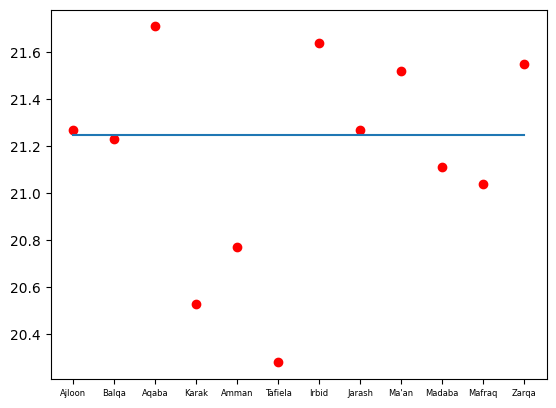

In [4]:
cols = [col for col in jordanTempAnnual.columns if col not in ['Year', 'Jordan']]
x=jordanTempAnnual.iloc[109 ,2:]
plt.scatter(cols,x,color='red')
plt.xticks(fontsize=6)
plt.plot(cols,[21.25]*12)  #2010 temperature , 12 number of cities


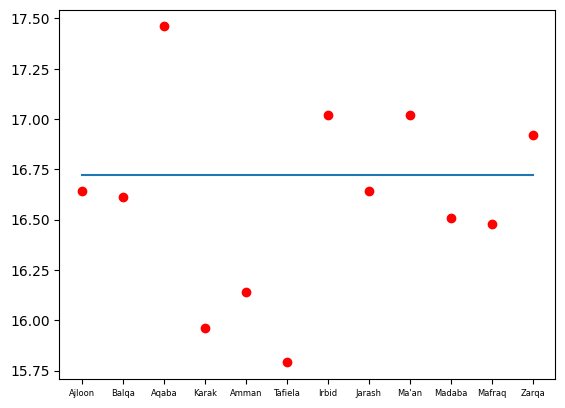

In [5]:
x2=jordanTempAnnual.iloc[2 ,2:]
plt.scatter(cols,x2,color='red')
plt.xticks(fontsize=6)
plt.plot(cols,[16.72]*12)  # 1903, , 12 number of cities

###  CO2 Analysis:

##### Comulative CO2:

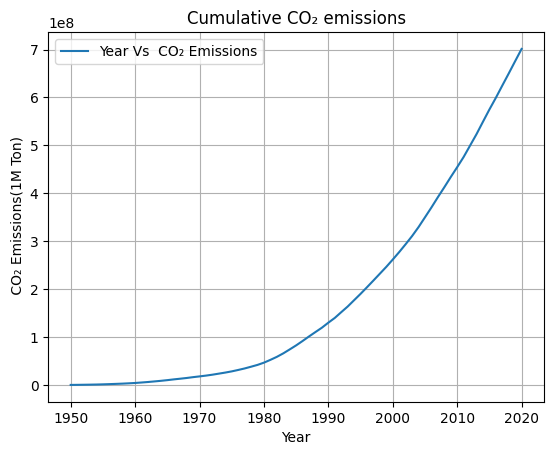

In [6]:
year=jordanCo2Emissions['Year']
Co2E=jordanCo2Emissions['CO2 Emissions']
plt.plot(year,Co2E,label='Year Vs  CO₂ Emissions')
plt.title("Cumulative CO₂ emissions")
plt.xlabel("Year")
plt.ylabel(" CO₂ Emissions(1M Ton)")
plt.legend()
plt.grid()


##### CO2 per year:

dataset=pd.read_csv('jordan_co2_emissions.csv')

In [7]:
jordanCo2Emissions['CO2 Emissions'].describe()

count    7.100000e+01
mean     1.805002e+08
std      2.085128e+08
min      1.722080e+05
25%      1.389085e+07
50%      8.268519e+07
75%      3.023499e+08
max      7.013023e+08
Name: CO2 Emissions, dtype: float64

##### The aim of this step is to find the CO2 emissions per year based on comulative CO2 

In [8]:
carbonemition = jordanCo2Emissions['CO2 Emissions']
carbonperyear = [carbonemition[0]]
for i in range(1,len(carbonemition)):
    x = carbonemition[i] - carbonemition[i-1]
    carbonperyear.append(x)

print(carbonperyear)

[172208.0, 161216.0, 194192.0, 212512.0, 252549.0, 380699.0, 450345.0, 494194.0, 523506.0, 655410.0, 743138.0, 977397.0, 1046953.0, 1218953.0, 1240848.0, 1420414.0, 1581332.0, 1412997.0, 1503972.0, 1756788.0, 1555684.0, 1654434.0, 1913598.0, 2199568.0, 2225305.0, 2489202.0, 2944596.0, 3153933.0, 3627347.0, 3776884.0, 4695815.0, 5825183.0, 6255687.0, 7299946.0, 8246872.0, 8421513.0, 9165052.0, 9506019.0, 9177012.0, 9079754.0, 10476423.0, 9903911.0, 11984199.0, 11774286.0, 13249567.0, 13208063.0, 13825418.0, 14074057.0, 14253067.0, 14266665.0, 15200204.0, 15609517.0, 16420437.0, 16982176.0, 18670695.0, 20436793.0, 20526390.0, 21436498.0, 20717997.0, 21336692.0, 20615325.0, 21243760.0, 23813801.0, 23813152.0, 25895022.0, 25556220.0, 24345622.0, 25561278.0, 25259630.0, 25744983.0, 25487430.0]


carbonperyear=[carbonemition[0]]
carbonperyear = [y - x for x, y in zip(carbonemition, carbonemition[1:])]
carbonperyear

##### Feature extraction step

In [9]:

jordanCo2Emissions['CO2 emission per year']=carbonperyear  # this step to add new col for dataset 

##### Statistical analysis of the CO2 emission per year

In [10]:
jordanCo2Emissions['CO2 emission per year'].describe() 

count    7.100000e+01
mean     9.877497e+06
std      8.881846e+06
min      1.612160e+05
25%      1.529828e+06
50%      8.421513e+06
75%      1.670131e+07
max      2.589502e+07
Name: CO2 emission per year, dtype: float64

In [11]:
jordanCo2Emissions

,Year,CO2 Emissions,CO2 emission per year
0,1950,172208.0,172208.0
1,1951,333424.0,161216.0
2,1952,527616.0,194192.0
3,1953,740128.0,212512.0
4,1954,992677.0,252549.0
...,...,...,...
66,2016,599248984.0,24345622.0
67,2017,624810262.0,25561278.0
68,2018,650069892.0,25259630.0
69,2019,675814875.0,25744983.0


In [12]:
y=jordanCo2Emissions.iloc[:,-1].values
x=jordanCo2Emissions.iloc[:,0].values

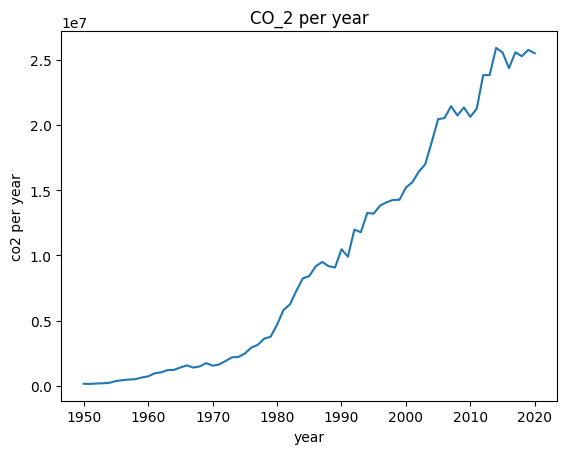

In [13]:
plt.plot(x, y)
plt.title('CO_2 per year')
plt.xlabel('year')
plt.ylabel('co2 per year')
plt.show()

In [14]:
jordanCo2Emissions[jordanCo2Emissions['CO2 emission per year']==jordanCo2Emissions['CO2 emission per year'].max()]

,Year,CO2 Emissions,CO2 emission per year
64,2014,549347142.0,25895022.0


##### Sort the CO2 emission per year based on their values in each year

In [15]:
srt=jordanCo2Emissions.sort_values(by=['CO2 emission per year'], ascending=False)
srt.head(0)  # to sort based on their value

,Year,CO2 Emissions,CO2 emission per year


dataset2=pd.read_csv('jordan_temp_annual.csv')

In [16]:
jordanTempAnnual[jordanTempAnnual['Year']==2014] # Temperature based on the year of the hieghest CO2 emission 

,Year,Jordan,Ajloon,Balqa,Aqaba,Karak,Amman,Tafiela,Irbid,Jarash,Ma'an,Madaba,Mafraq,Zarqa
113,2014,19.88,19.78,19.76,20.65,19.11,19.3,18.96,20.18,19.78,20.19,19.65,19.62,20.1


In [17]:
maxmin2=jordanTempAnnual[(jordanTempAnnual["Jordan"]==jordanTempAnnual["Jordan"].max()) | (jordanTempAnnual["Jordan"]==jordanTempAnnual["Jordan"].min())|(jordanTempAnnual['Year']==2014)]

In [18]:
maxmin2 # Compare the temperature of the hieghest CO2 emission with the hieghest and lowest temperature value.

,Year,Jordan,Ajloon,Balqa,Aqaba,Karak,Amman,Tafiela,Irbid,Jarash,Ma'an,Madaba,Mafraq,Zarqa
2,1903,16.72,16.64,16.61,17.46,15.96,16.14,15.79,17.02,16.64,17.02,16.51,16.48,16.92
109,2010,21.25,21.27,21.23,21.71,20.53,20.77,20.28,21.64,21.27,21.52,21.11,21.04,21.55
113,2014,19.88,19.78,19.76,20.65,19.11,19.30,18.96,20.18,19.78,20.19,19.65,19.62,20.10


##### The aim of this step is to visualise comparision between the temperature of the hieghest CO2 emission with the hieghest and lowest temperature value

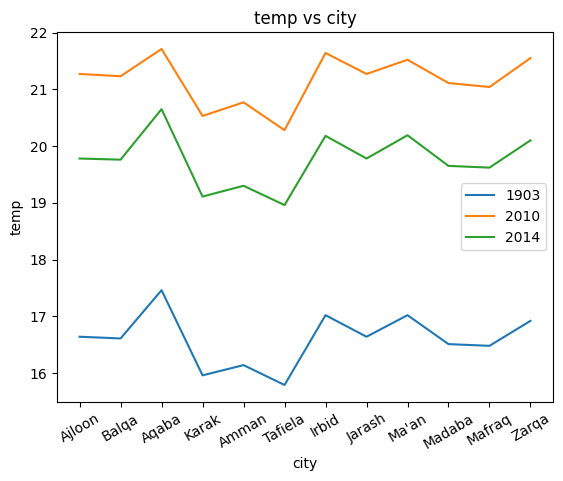

In [19]:
x=[city for city in jordanTempAnnual.columns if city != 'Year' and city !='Jordan']
y=maxmin2.iloc[0:1,2:].values.reshape(-1,1)
y2=maxmin2.iloc[1:2,2:].values.reshape(-1,1)
y3=maxmin2.iloc[2:3,2:].values.reshape(-1,1)
plt.plot(x, y,label='1903')
plt.plot(x, y2,label='2010')
plt.plot(x, y3,label='2014')
plt.title('temp vs city')
plt.xlabel('city')
plt.ylabel('temp')
plt.xticks(rotation=30)
plt.legend()
plt.show()

##### The aim of this step is to visualise comparision between the temperature of the hieghest CO2 emission with the hieghest and lowest temperature value

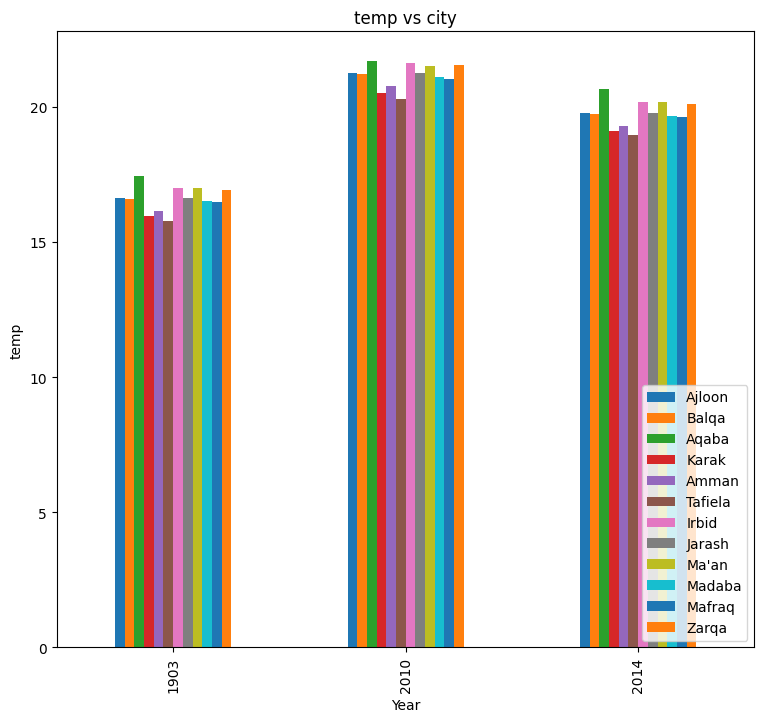

In [20]:
maxmin2.plot(x='Year', y=x, kind="bar",figsize=(9,8))
plt.title('temp vs city')
plt.ylabel('temp')
plt.legend(loc='lower right')

In [21]:
#Merge the co2 emittion and temperature datasets:
tc=pd.merge(jordanTempAnnual, jordanCo2Emissions,left_index=False, right_index=False)

In [22]:
tc

,Year,Jordan,Ajloon,Balqa,Aqaba,Karak,Amman,Tafiela,Irbid,Jarash,Ma'an,Madaba,Mafraq,Zarqa,CO2 Emissions,CO2 emission per year
0,1950,18.15,18.19,18.15,18.97,17.45,17.62,17.29,18.48,18.19,18.51,18.01,17.76,18.35,172208.0,172208.0
1,1951,19.13,19.13,19.10,19.66,18.41,18.62,18.23,19.52,19.13,19.42,18.99,18.90,19.41,333424.0,161216.0
2,1952,19.20,19.16,19.16,19.85,18.51,18.71,18.33,19.52,19.16,19.53,19.09,18.89,19.46,527616.0,194192.0
3,1953,18.27,18.15,18.13,18.87,17.64,17.69,17.47,18.52,18.15,18.63,18.07,17.97,18.44,740128.0,212512.0
4,1954,18.93,18.92,18.89,19.42,18.22,18.39,18.03,19.29,18.92,19.21,18.77,18.74,19.16,992677.0,252549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2016,20.07,20.02,20.00,20.88,19.36,19.52,19.20,20.39,20.02,20.41,19.90,19.73,20.29,599248984.0,24345622.0
67,2017,19.83,19.76,19.72,20.53,19.06,19.27,18.88,20.16,19.76,20.13,19.60,19.56,20.08,624810262.0,25561278.0
68,2018,20.44,20.37,20.34,21.18,19.68,19.88,19.53,20.77,20.37,20.72,20.23,20.19,20.67,650069892.0,25259630.0
69,2019,19.89,19.82,19.79,20.62,19.12,19.33,18.94,20.23,19.82,20.20,19.68,19.62,20.11,675814875.0,25744983.0


##### This step aims to find the correlation between the CO2 emissions and temperature per year 

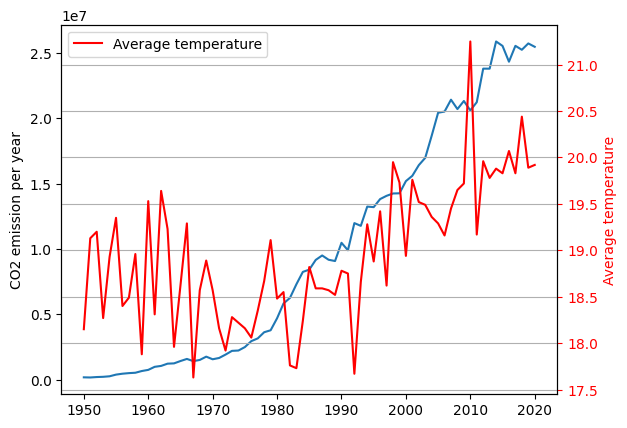

In [23]:
#Plot them togother:
x=tc['Year']
y=tc['CO2 emission per year']
y1=tc['Jordan']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(x,y,label='CO2 emission per year') #plot the CO2 emittion on axis')
ax2.plot(x,y1,label='Average temperature',color="red")
ax1.set_ylabel('CO2 emission per year')
ax2.set_ylabel('Average temperature')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', colors='r')
plt.xlabel('Years')
plt.legend()
#plt.legend([ 'Average temperature','CO2 emission per year'],loc ='lower right')
plt.grid()
plt.show()

In [24]:
tc['Difftemp']=tc['Jordan'].diff()

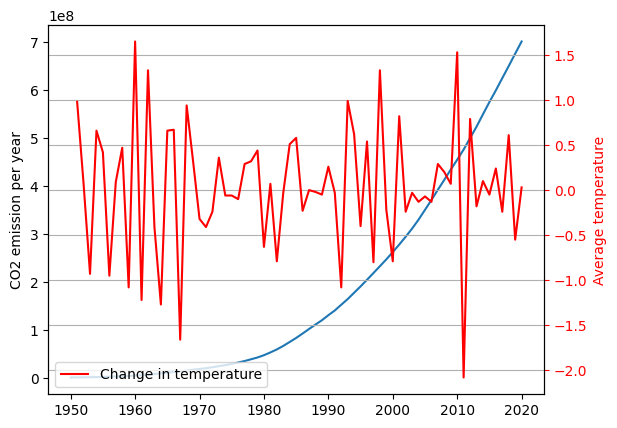

In [25]:
x=tc['Year']
y=tc['CO2 Emissions']
y1=tc['Difftemp']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(x,y,label='CO2 emission per year') #plot the CO2 emittion on axis')
ax2.plot(x,y1,label='Change in temperature',color="red")
ax1.set_ylabel('CO2 emission per year')
ax2.set_ylabel('Average temperature')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', colors='r')
plt.xlabel('Years')
plt.legend()
#plt.legend([ 'Average temperature','CO2 emission per year'],loc ='lower right')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Change in temperature per year vs year')

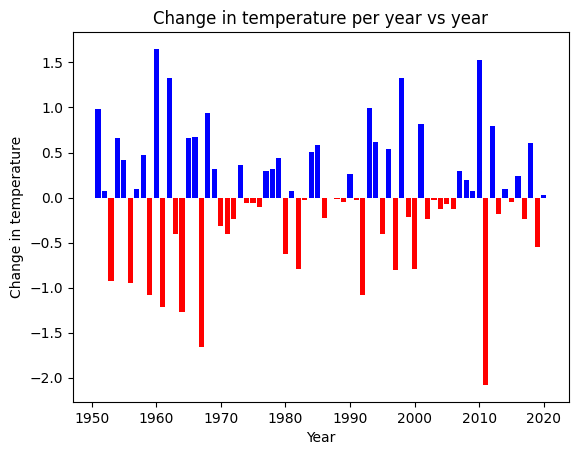

In [26]:
tc['pos']=tc['Difftemp']>0
plt.bar(x,y1,color=tc.pos.map({True:'b',False:'r'}))
plt.xlabel('Year')
plt.ylabel('Change in temperature')
plt.title('Change in temperature per year vs year')

In [27]:
tc['Diffco2']=tc['CO2 emission per year'].diff()
y2=tc['Diffco2']

In [28]:
positive=[p for p in tc['Diffco2'] if p>0]
negative=[n for n in tc['Diffco2'] if n<0]


Text(0.5, 1.0, 'Changeing in CO2 emission per year')

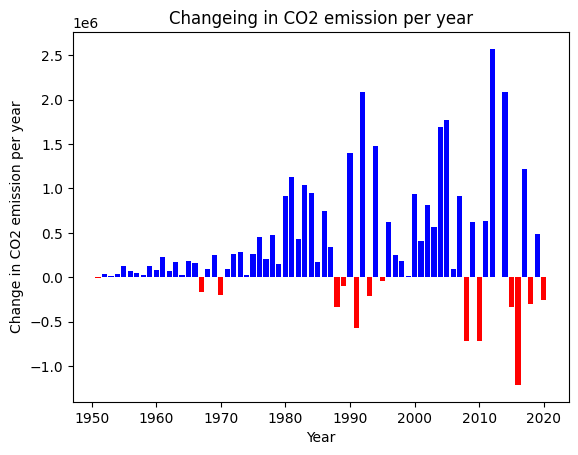

In [29]:
tc['positive']=tc['Diffco2']>0 
#y3=tc['Diffco2'].plot(kind='bar',color=tc.positive.map({True:'g',False:'r'}))
plt.bar(x,y2,color=tc.positive.map({True:'b',False:'r'}))
plt.xlabel('Year')
plt.ylabel('Change in CO2 emission per year')
plt.title('Changeing in CO2 emission per year')

### Temperature Per Month Analysis

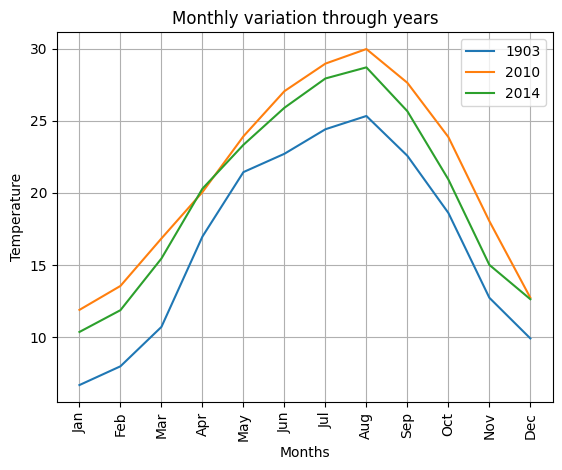

In [30]:
Months = [month for month in MonthlyTemp.columns if month not in ['Year']]
Month_Temp_1903=MonthlyTemp.iloc[2, 1:]
Month_Temp_2010=MonthlyTemp.iloc[109, 1:]
Month_Temp_2014=MonthlyTemp.iloc[113, 1:]
plt.plot(Months , Month_Temp_1903,label='1903')
plt.plot(Months , Month_Temp_2010,label='2010')
plt.plot(Months , Month_Temp_2014,label='2014')
plt.title('Monthly variation through years')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### Analysis Of CO2 per Sectors

##### This step aims to compare the CO2 emission per sector to find out which sector has the major impact.

##### CO2 emission per sector in 2014

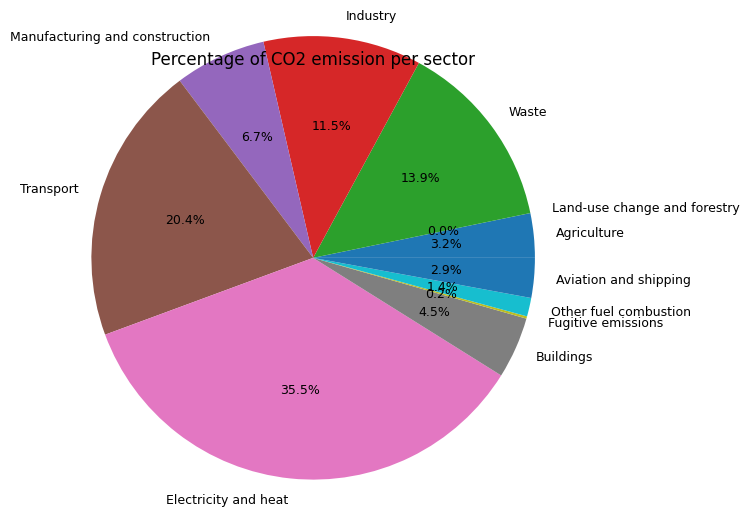

In [31]:
#sectorswastes[sectorswastes['Year']==2014]
label=[sector for sector in sectorswastes.columns if sector!='Year' ]
x=sectorswastes.iloc[24,1:]
plt.pie(x, labels=label,autopct='%1.1f%%',textprops={'fontsize': 9}, radius=1.5,center=(0, -70))
plt.title('Percentage of CO2 emission per sector')
plt.show()

##### CO2 emission per sector in 2010

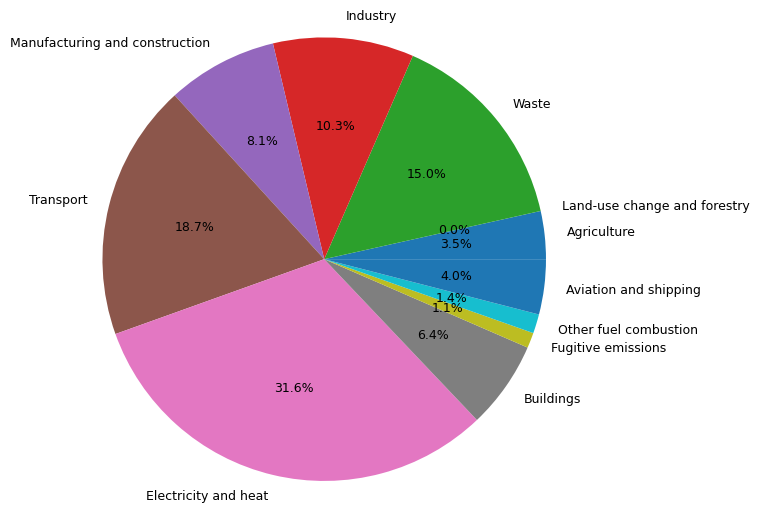

In [32]:
#sectorswastes[sectorswastes['Year']==2010]
label=[sector for sector in sectorswastes.columns if sector!='Year' ]
x=sectorswastes.iloc[20,1:]
plt.pie(x, labels=label,autopct='%1.1f%%',textprops={'fontsize': 9}, radius=1.5)

plt.show()

##### CO2 emission per sector in 1990

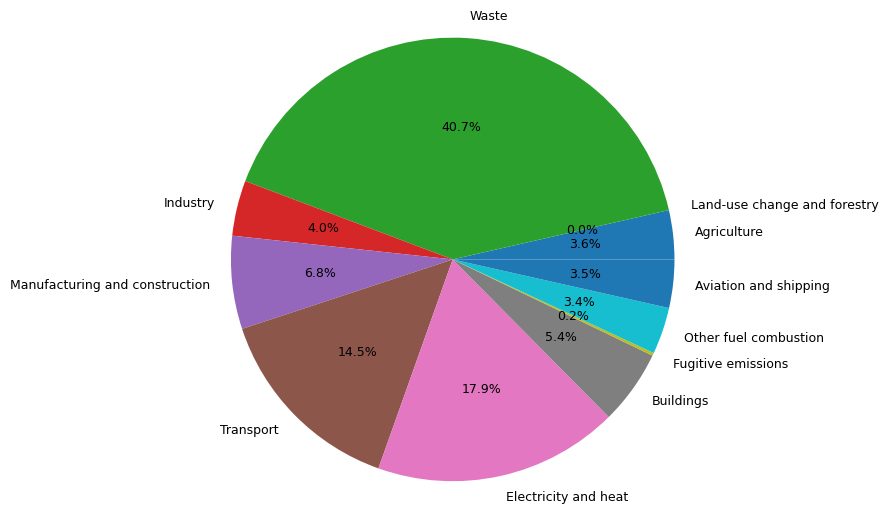

In [33]:
sectorswastes[sectorswastes['Year']==1990]
label=[sector for sector in sectorswastes.columns if sector!='Year' ]
x=sectorswastes.iloc[0,1:]
plt.pie(x, labels=label,autopct='%1.1f%%',textprops={'fontsize': 9}, radius=1.5)

plt.show()

##### CO2 emission per sector from 1990-2019

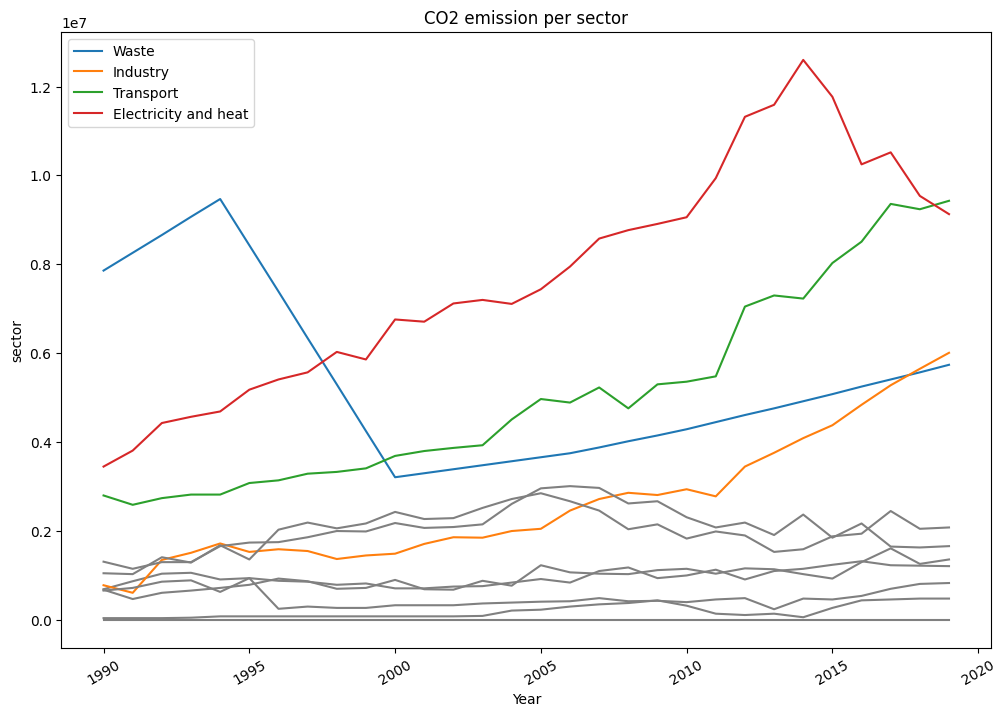

In [34]:
plt.rcParams['figure.figsize'] = [12, 8]
x = sectorswastes['Year']
Agriculture=sectorswastes['Agriculture']   
Landusechangeandforestry=sectorswastes['Land-use change and forestry'] 
Waste=sectorswastes['Waste']
Industry=sectorswastes['Industry']
Manufacturingandconstruction=sectorswastes['Manufacturing and construction']	
Transport=sectorswastes['Transport']
Electricityandheat=sectorswastes['Electricity and heat']
Buildings=sectorswastes['Buildings']
Fugitiveemissions=sectorswastes['Fugitive emissions']
Otherfuelcombustion=sectorswastes['Other fuel combustion']
Aviationandshipping=sectorswastes['Aviation and shipping']

plt.plot(x,Agriculture,color='gray')     
plt.plot(x,Landusechangeandforestry,color='gray')
plt.plot(x,Waste,label='Waste')
plt.plot(x,Industry,label='Industry')
plt.plot(x,Manufacturingandconstruction,color='grey')
plt.plot(x,Transport,label='Transport')
plt.plot(x,Electricityandheat,label='Electricity and heat')
plt.plot(x,Buildings,color='gray')
plt.plot(x,Fugitiveemissions,color='gray')
plt.plot(x,Otherfuelcombustion,color='gray')
plt.plot(x,Aviationandshipping,color='gray')

plt.title('CO2 emission per sector')
plt.xlabel('Year')
plt.ylabel('sector')
plt.xticks(rotation=30)
plt.legend()
plt.show()

##### Mean CO2 emission per sector

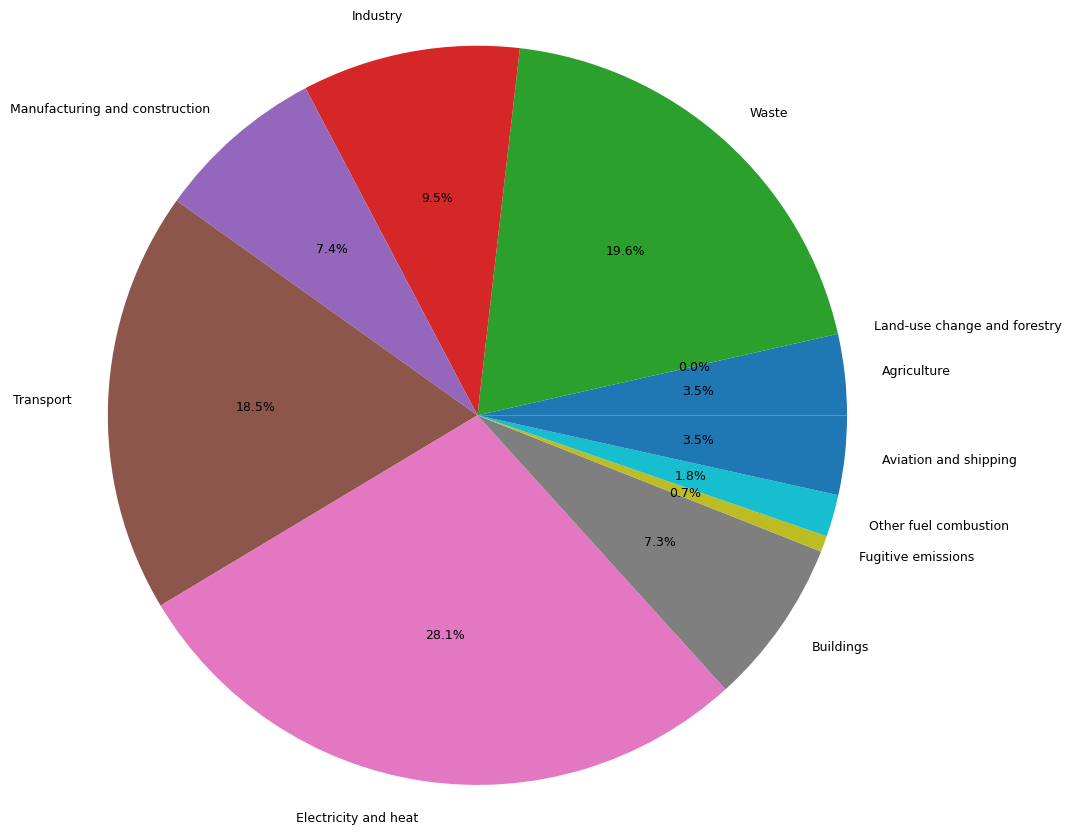

In [35]:
label=[sector for sector in sectorswastes.columns if sector!='Year' ]
df=[sectorswastes[sector].mean() for sector in sectorswastes.columns if sector!='Year']
plt.pie(df, labels=label,autopct='%1.1f%%',textprops={'fontsize': 9}, radius=1.5)

plt.show()